In [17]:
import polars as pl
import datamol as dm

Using datamol - Python library that works with molecules

Key question:

- Convert to SELFIES for ML models (more robust)
- Get scaffolds of the anti-infective compounds from ChEMBL
- Look into fragments of these anti-infective compounds
- Convert compound 3 (?use SDF or ChemDraw) into SELFIES, identify its scaffold
- Align compound 3 with other scaffolds from ChEMBL
- Look for MCS (maximum common structure)
- Identify any similarities or differences between anti-infectives from ChEMBL and compound 3
- Once found scaffolds, fragments or MCS, set up random forest (or other types) model for ML learning

In [2]:
df_ai = pl.read_csv("chembl_anti-inf.csv", separator = ";")
df_ai.head()

Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,First Approval,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Indication Class,Patent,Drug Type,Passes Rule of Five,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles
str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,i64,i64,i64,i64,i64,str,str
"""CHEMBL374975""","""FUSIDIC ACID""","""ANHYDROUS FUSI…","""CEM-102|NSC-56…",4.0,"""""","""""","""1967""","""""","""""","""""","""J01XC01 | S01A…","""J01XC - Steroi…","""J01X - OTHER A…","""J01 - ANTIBACT…","""J - ANTIINFECT…","""Antibacterial""","""None""","""1:Synthetic Sm…",0,0,"""Single Stereoi…",0,0,0,0,0,"""Unknown""","""CC(=O)O[C@H]1C…"
"""CHEMBL130""","""CHLORAMPHENICO…","""9-HYDROXY-9-PH…","""NSC-16331|NSC-…",4.0,"""Ivax Pharmaceu…","""""","""""","""""","""""","""1950""","""S01AA01 | S03A…","""S01AA - Antibi…","""S01A - ANTIINF…","""S01 - OPHTHALM…","""S - SENSORY OR…","""Antibacterial;…","""None""","""1:Synthetic Sm…",1,0,"""Single Stereoi…",0,1,1,1,0,"""Unknown""","""O=C(N[C@H](CO)…"
"""CHEMBL186""","""CEFEPIME""","""BMY-28142|CEFE…","""BMY-28142|J01D…",4.0,"""Samson Medical…","""'cef-'""","""1987""","""cephalosporins…","""'cef-(cef-)'""","""1996""","""J01DE01""","""J01DE - Fourth…","""J01D - OTHER B…","""J01 - ANTIBACT…","""J - ANTIINFECT…","""Antibacterial""","""None""","""1:Synthetic Sm…",1,0,"""Single Stereoi…",0,0,1,0,0,"""Prescription O…","""CO/N=C(\C(=O)N…"
"""CHEMBL222645""","""FLOXACILLIN""","""ABBOFLOX|BRL 2…","""BRL 2039|BRL-2…",4.0,"""""","""'-cillin'""","""1972""","""penicillins""","""'-cillin(-cill…","""""","""J01CF05""","""J01CF - Beta-l…","""J01C - BETA-LA…","""J01 - ANTIBACT…","""J - ANTIINFECT…","""Antibacterial""","""None""","""1:Synthetic Sm…",1,0,"""Single Stereoi…",0,0,0,0,0,"""Unknown""","""Cc1onc(-c2c(F)…"
"""CHEMBL2364632""","""SARECYCLINE""","""P-005672|P0056…","""P-005672|P0056…",4.0,"""Almirall Llc""","""'-cycline'""","""2012""","""antibiotics (t…","""'-cycline(-cyc…","""2018""","""J01AA14""","""J01AA - Tetrac…","""J01A - TETRACY…","""J01 - ANTIBACT…","""J - ANTIINFECT…","""""","""US-8318706-B2""","""1:Synthetic Sm…",1,0,"""Single Stereoi…",0,1,0,0,0,"""Prescription O…","""CON(C)Cc1ccc(O…"


In [3]:
print(df_ai.glimpse())

Rows: 144
Columns: 29
$ Parent Molecule     <str> CHEMBL374975, CHEMBL130, CHEMBL186, CHEMBL222645, CHEMBL2364632, CHEMBL62193, CHEMBL2303613, CHEMBL31, CHEMBL268869, CHEMBL3039597
$ Name                <str> FUSIDIC ACID, CHLORAMPHENICOL, CEFEPIME, FLOXACILLIN, SARECYCLINE, SULFADIMETHOXINE, CEFODIZIME, GATIFLOXACIN, SULFAMETHOXYPYRIDAZINE, GENTAMICIN
$ Synonyms            <str> ANHYDROUS FUSIDIC ACID|CEM-102|FUCIDIN CAVIJECT|FUCITHALMIC|FUSIDATE|FUSIDIC ACID|NSC-56192|RAMYCIN|SQ 16,603|SQ-16603|TAKSTA, 9-HYDROXY-9-PHENYLXANTHENE|9-PHENYL-9H-XANTHEN-9-OL|AMPHICOL|BROCHLOR|BROLENE ANTIBIOTIC|CHLORAMPHENICOL|CHLOROFAIR|CHLOROPTIC|CHLOROPTIC S.O.P.|Chloramex|Chloramphenicol|Chlorbiotic|Chloromycetin|ECONOCHLOR|GOLDEN EYE ANTIBIOTIC|KEMICETINE|KLORAFECT|Kernispray|MYCHEL|Mychel-S|NSC-16331|NSC-3069|OPHTHOCHLOR|OPTOMYCIN|SNO PHENICOL|TUBILUX INFECTED EYES|Tevcocin|XANTHEN-9-OL, 9-PHENYL-, BMY-28142|CEFEPIME|J01DE01|Maxipime|RENAPIME|VNRX-5022, ABBOFLOX|BRL 2039|BRL-2039|CULPEN|FLOXACILLIN|

In [4]:
df_ai_name_sm = df_ai.select(["Name", "Smiles"])
df_ai_name_sm.head()

Name,Smiles
str,str
"""FUSIDIC ACID""","""CC(=O)O[C@H]1C…"
"""CHLORAMPHENICO…","""O=C(N[C@H](CO)…"
"""CEFEPIME""","""CO/N=C(\C(=O)N…"
"""FLOXACILLIN""","""Cc1onc(-c2c(F)…"
"""SARECYCLINE""","""CON(C)Cc1ccc(O…"


In [5]:
#df_ai.write_csv("df_ai.csv", sep = ",")

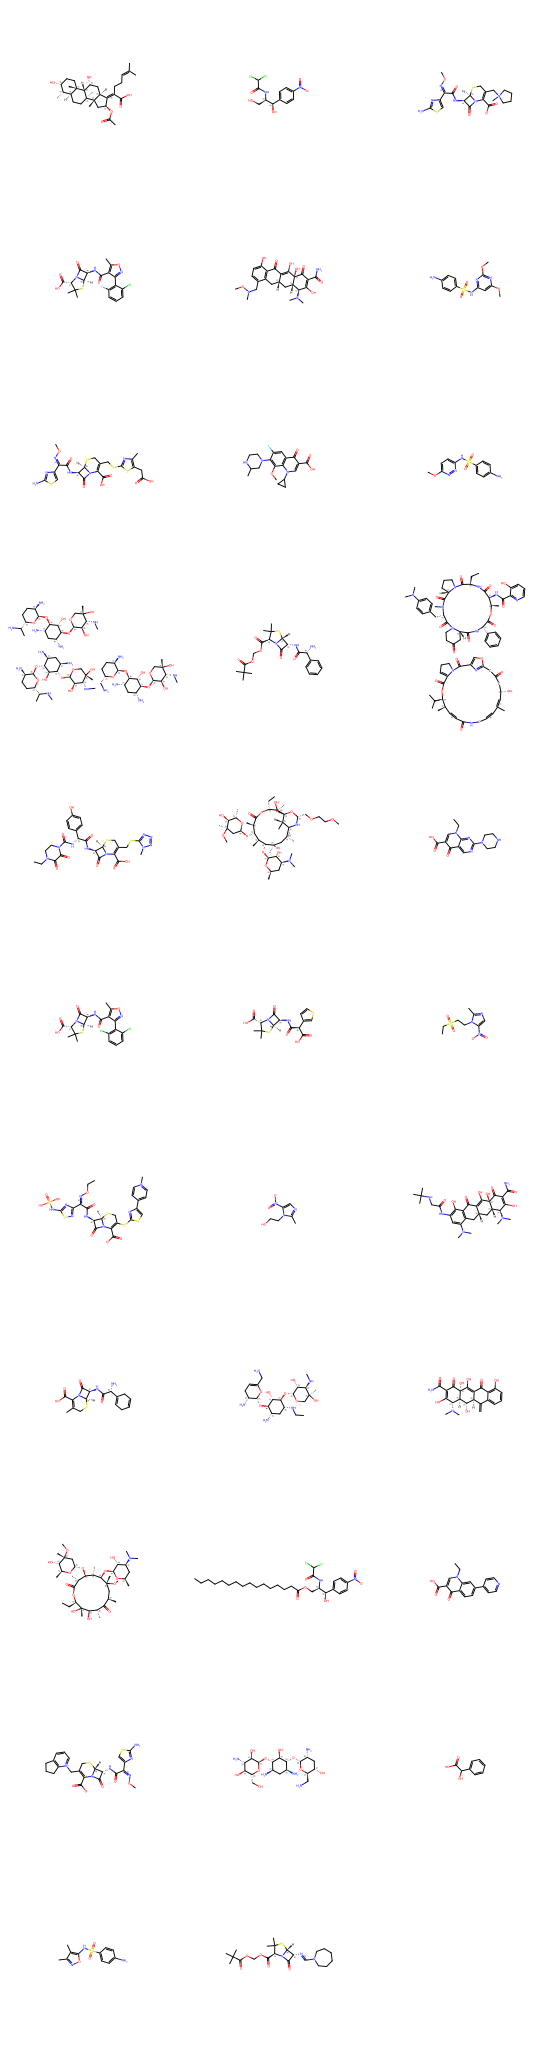

In [18]:
# Grab all SMILES from df_ai
df_ai_sm = df_ai["Smiles"]
# Load a list of molecules in SMILES
mol_ls = [dm.to_mol(smile) for smile in df_ai_sm]
# Convert the list of molecules into 2D images
dm.to_image(mol_ls, n_cols = 3, mol_size = (400, 400))

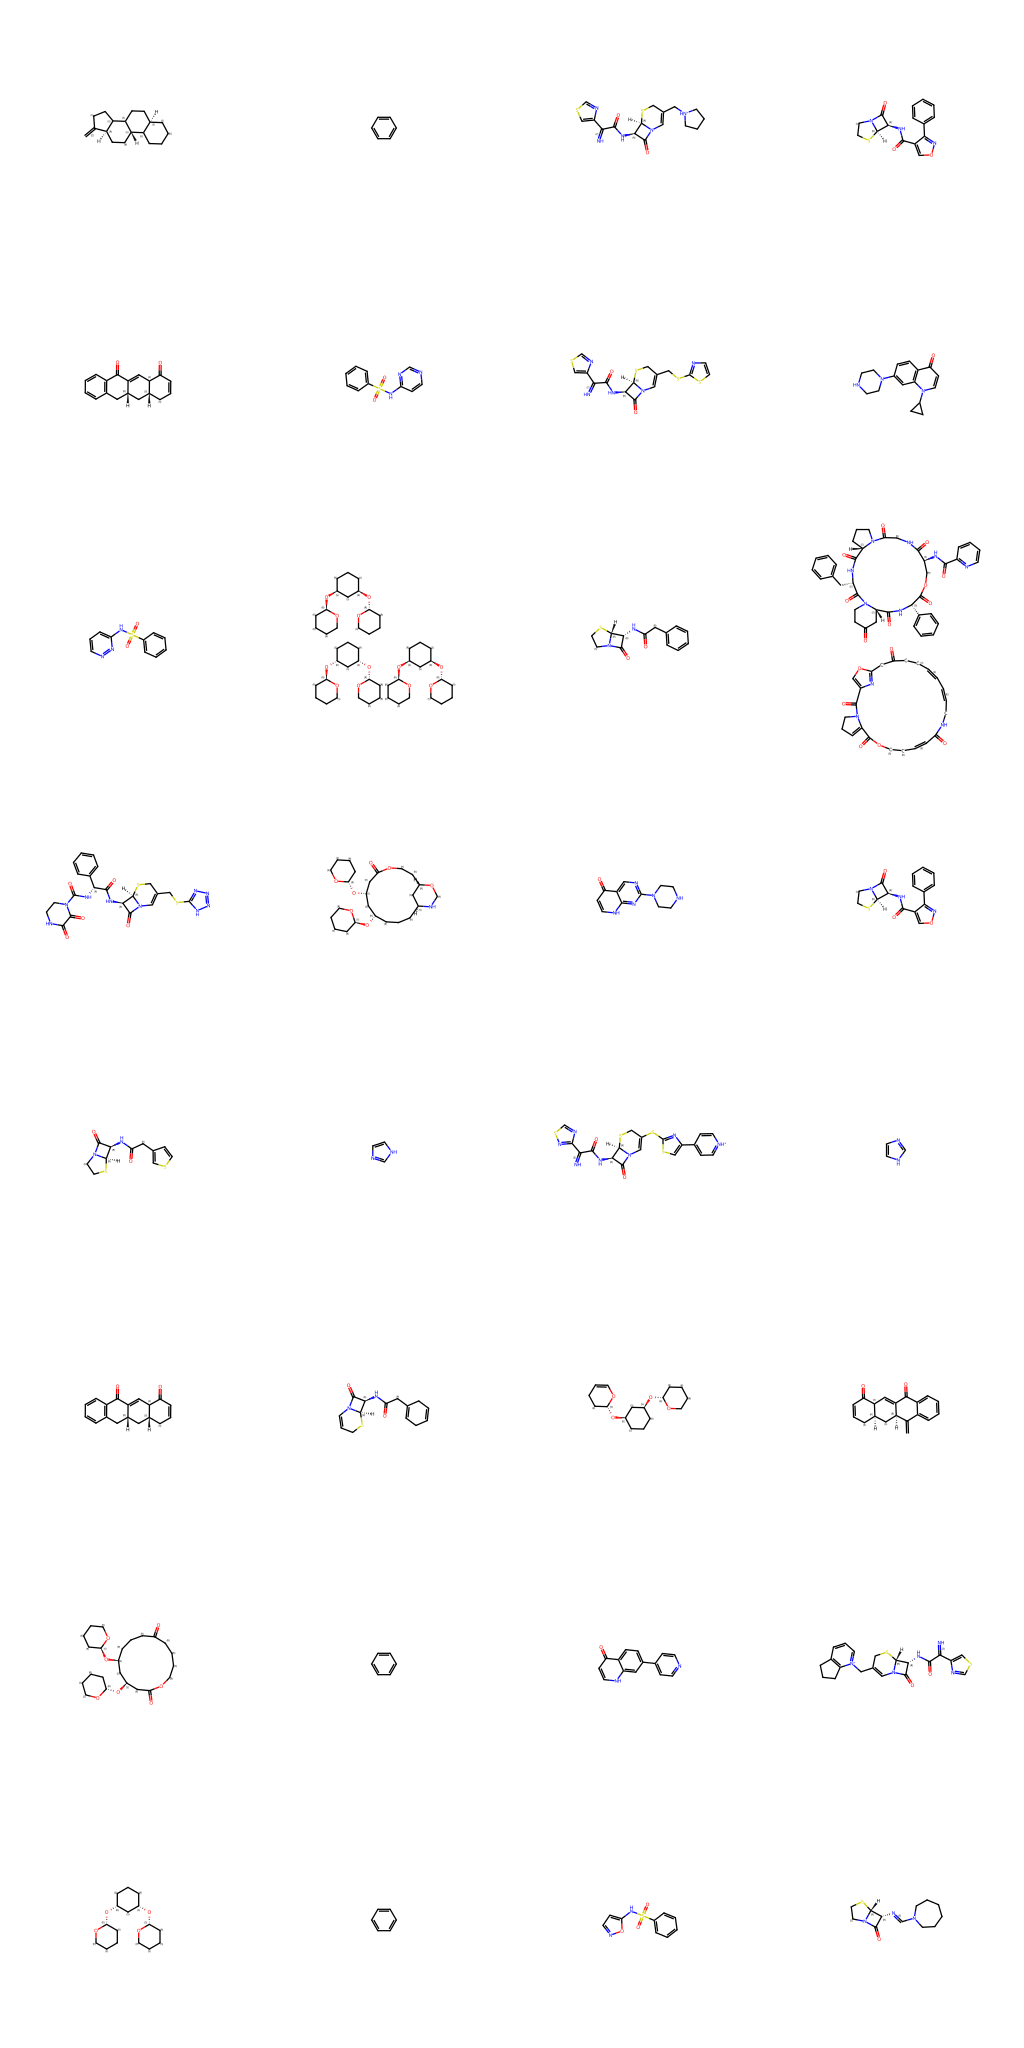

In [16]:
# Extract Murcko scaffolds from mol_ls
m_scaffolds = [dm.to_scaffold_murcko(mol) for mol in mol_ls]
dm.to_image(m_scaffolds, mol_size = (400, 400))